In [2]:
import pandas as pd
df=pd.read_csv(
    "Data/imdb_clean.csv")
df.head()

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


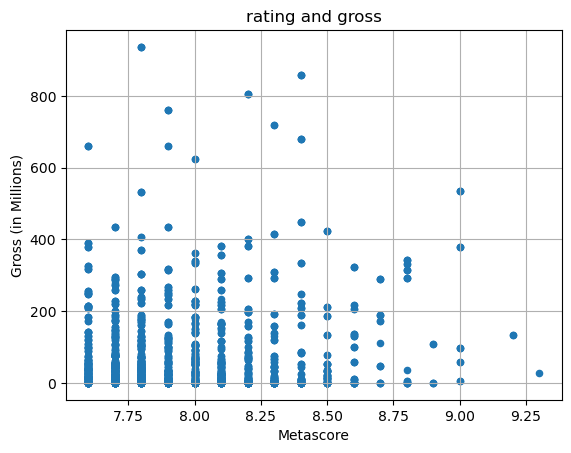

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(
    "Data/imdb_clean.csv")


df.plot(kind='scatter', x='rating', y='gross(M)', alpha=1)
plt.title('rating and gross')
plt.xlabel('Metascore')
plt.ylabel('Gross (in Millions)')
plt.grid(True)
plt.show()


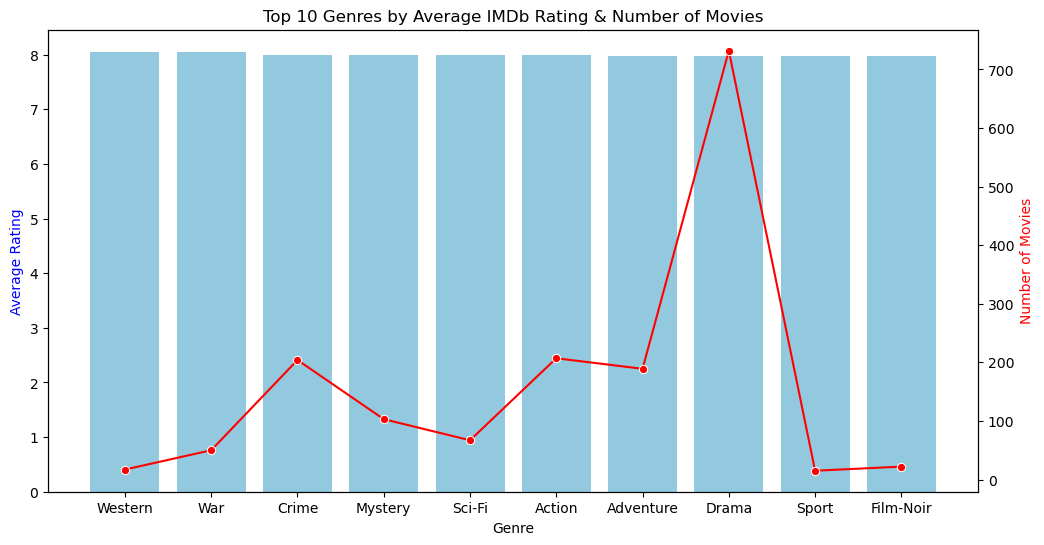

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (you already have this)
df = pd.read_csv("Data/imdb_clean.csv")

# Group by genre, calculate average rating and count of movies
genre_stats = df.groupby('genre').agg(
    avg_rating=('rating', 'mean'),
    movie_count=('title', 'count')
).reset_index()

# Sort by average rating and take top 10
top10_genres = genre_stats.sort_values(by='avg_rating', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for average rating
sns.barplot(data=top10_genres, x='genre', y='avg_rating', ax=ax1, color='skyblue')
ax1.set_ylabel('Average Rating', color='blue')
ax1.set_xlabel('Genre')
ax1.set_title('Top 10 Genres by Average IMDb Rating & Number of Movies')

# Create a second y-axis to show number of movies
ax2 = ax1.twinx()
sns.lineplot(data=top10_genres, x='genre', y='movie_count', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Number of Movies', color='red')

plt.xticks(rotation=45)
plt.show()


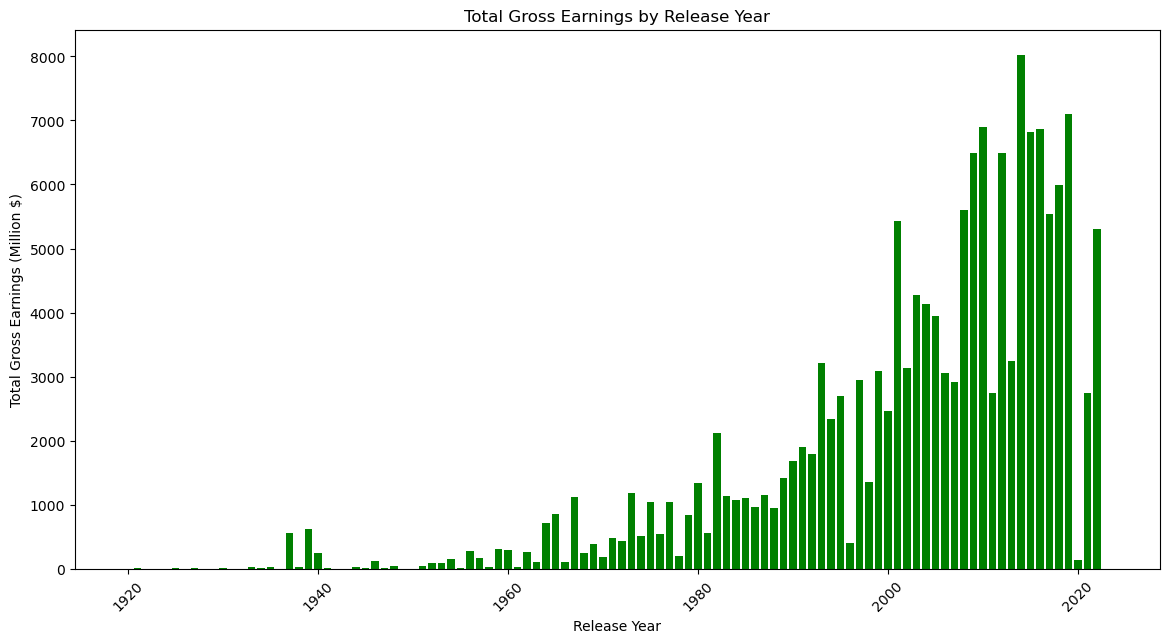

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data/imdb_clean.csv")

# Sum gross earnings by release year
earnings_by_year = df.groupby('release_year')['gross(M)'].sum().sort_index()

# Plot
plt.figure(figsize=(14,7))
plt.bar(earnings_by_year.index, earnings_by_year.values, color='green')
plt.xlabel('Release Year')
plt.ylabel('Total Gross Earnings (Million $)')
plt.title('Total Gross Earnings by Release Year')
plt.xticks(rotation=45)
plt.show()


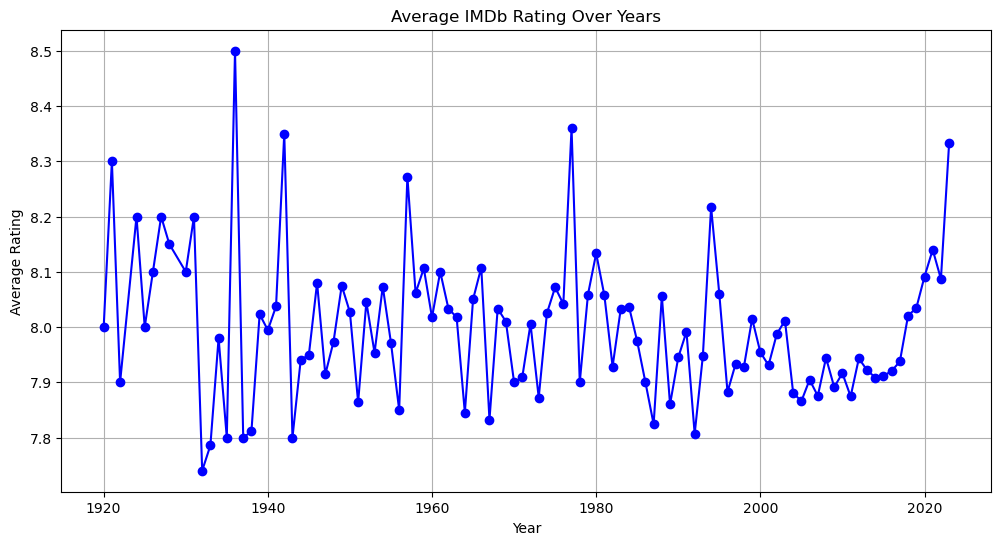

In [24]:
avg_rating_year = df.groupby('release_year')['rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_rating_year.index, avg_rating_year.values, marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average IMDb Rating Over Years')
plt.grid(True)
plt.show()


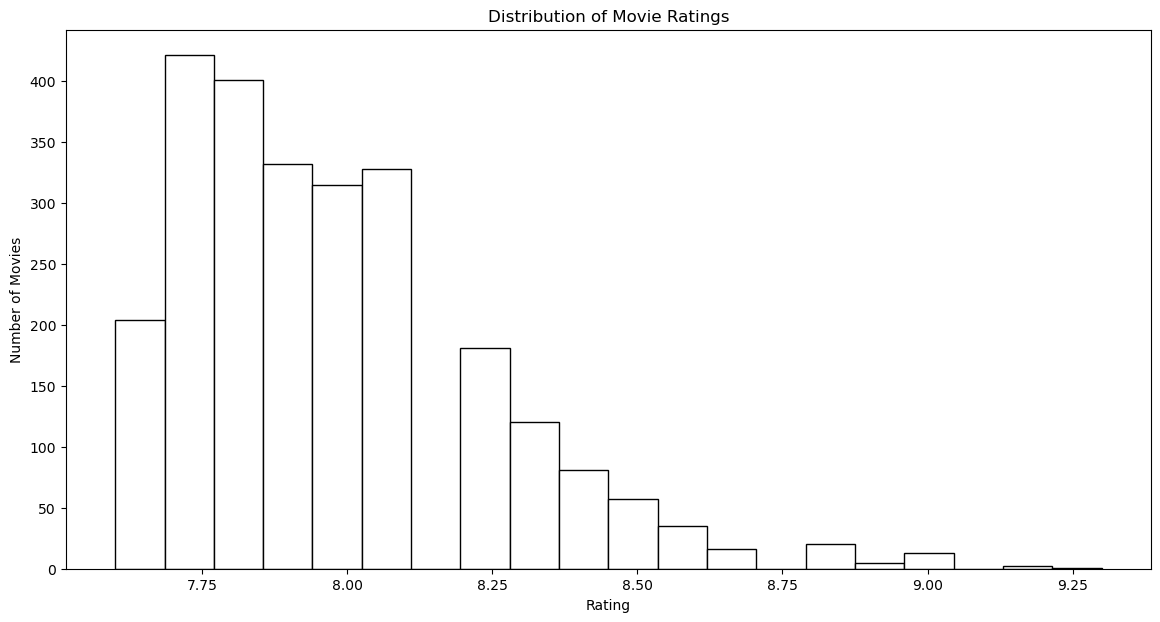

In [51]:
plt.figure(figsize=(14,7))
plt.hist(df['rating'], bins=20, color='white', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()


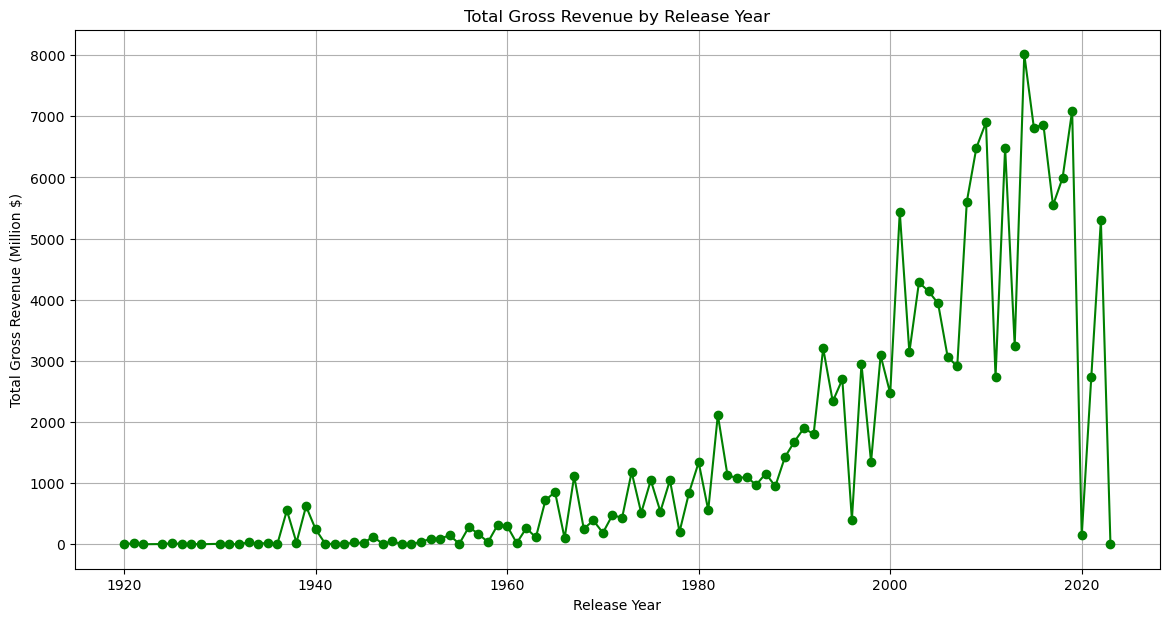

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data/imdb_clean.csv")

# Aggregate total revenue by year
revenue_by_year = df.groupby('release_year')['gross(M)'].sum().sort_index()

# Plot
plt.figure(figsize=(14,7))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o', color='green')
plt.xlabel('Release Year')
plt.ylabel('Total Gross Revenue (Million $)')
plt.title('Total Gross Revenue by Release Year')
plt.grid(True)
plt.show()


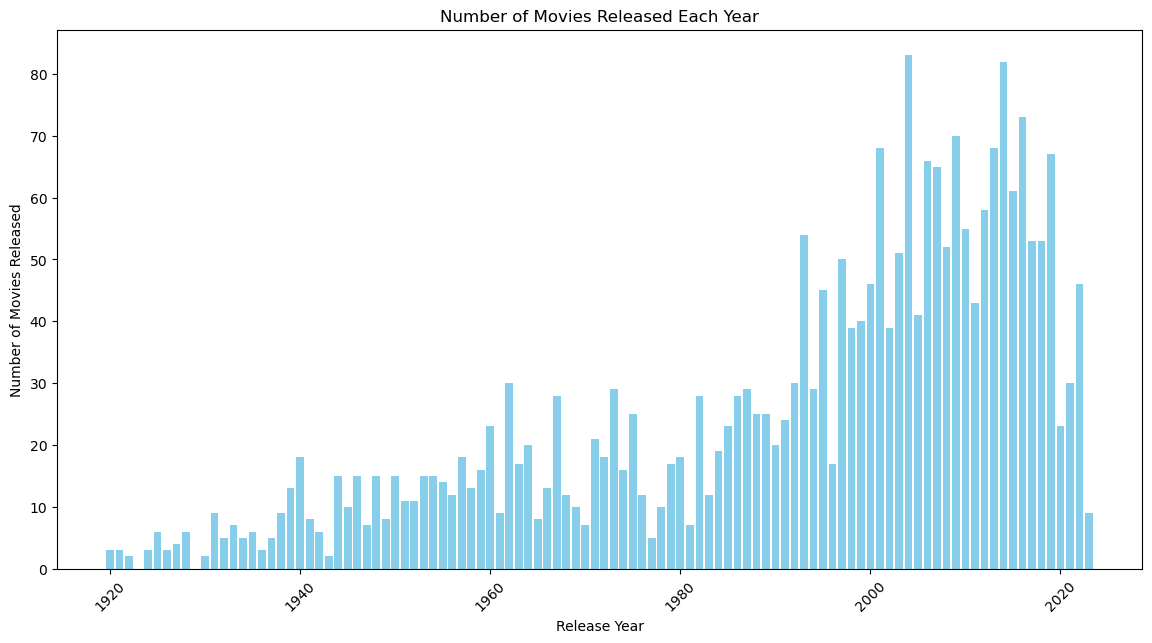

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data/imdb_clean.csv")

# Count movies by release year
movies_per_year = df.groupby('release_year').size().sort_index()

# Plot bar chart
plt.figure(figsize=(14,7))
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45)
plt.show()


In [53]:
import pandas as pd
df=pd.read_csv(
    "Data/imdb_clean.csv")
df.head()

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [10]:
import pandas as pd
df=pd.read_csv(
    "Data/imdb_clean.csv")
# Drop duplicates (same movie with multiple genres)
df_unique = df.drop_duplicates(subset=['title', 'director', 'release_year'])

# Sort by rating and display top 5
top_5 = df_unique.sort_values(by='rating', ascending=False).head(5)
print(top_5[['title', 'rating','genre']])


                      title  rating      genre
0  The Shawshank Redemption     9.3      Drama
1             The Godfather     9.2      Crime
3           The Dark Knight     9.0     Action
6          Schindler's List     9.0  Biography
9              12 Angry Men     9.0      Crime


In [11]:
# Group by director and list movies
movies_by_director = df_unique.groupby('director')['title'].apply(list)

# Display
print(movies_by_director)

director
Aamir Khan                             [Like Stars on Earth]
Aaron Sorkin                    [The Trial of the Chicago 7]
Abbas Kiarostami                           [Taste of Cherry]
Abdellatif Kechiche             [Blue Is the Warmest Colour]
Abhishek Pathak                                 [Drishyam 2]
                                       ...                  
Zaza Urushadze                                  [Tangerines]
Zoya Akhtar            [Zindagi Na Milegi Dobara, Gully Boy]
Çagan Irmak                           [My Father and My Son]
Ömer Faruk Sorak                                  [G.O.R.A.]
Ömer Vargi                     [Everything's Gonna Be Great]
Name: title, Length: 560, dtype: object
